<a href="https://colab.research.google.com/github/assaabriiii/AI/blob/main/MLP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [96]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.0
y = y.astype(int)

In [97]:
images = X.reshape(-1, 28, 28)

def extract_4x4_features(img):

    feats = []
    for i in range(0, 28, 4):
        for j in range(0, 28, 4):
            patch = img[i:i+4, j:j+4]
            feats.append(patch.mean())
    return np.array(feats)

In [98]:
X_features = np.array([extract_4x4_features(img) for img in images])
print("New shape:", X_features.shape)

New shape: (70000, 49)


In [99]:
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y, test_size=0.2, random_state=42, stratify=y)

In [100]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(10,),      # smallest size that gave ≥90%
    activation='relu',
    learning_rate='constant',      # fixed 0.01 won
    learning_rate_init=0.01,
    batch_size=64,
    max_iter=200,
    random_state=42,
    verbose=True
)

In [101]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.58398759
Iteration 2, loss = 0.39087906
Iteration 3, loss = 0.37221973
Iteration 4, loss = 0.36126693
Iteration 5, loss = 0.35512522
Iteration 6, loss = 0.35005992
Iteration 7, loss = 0.34386971
Iteration 8, loss = 0.33861539
Iteration 9, loss = 0.33628166
Iteration 10, loss = 0.33060142
Iteration 11, loss = 0.32841245
Iteration 12, loss = 0.32608519
Iteration 13, loss = 0.32194471
Iteration 14, loss = 0.31973346
Iteration 15, loss = 0.32098156
Iteration 16, loss = 0.31904629
Iteration 17, loss = 0.31552126
Iteration 18, loss = 0.31617822
Iteration 19, loss = 0.31489193
Iteration 20, loss = 0.31384900
Iteration 21, loss = 0.31150760
Iteration 22, loss = 0.31139870
Iteration 23, loss = 0.31122125
Iteration 24, loss = 0.31057147
Iteration 25, loss = 0.30857317
Iteration 26, loss = 0.30918905
Iteration 27, loss = 0.30770302
Iteration 28, loss = 0.30498472
Iteration 29, loss = 0.30635731
Iteration 30, loss = 0.30496998
Iteration 31, loss = 0.30428946
Iteration 32, los

MLPClassifier(batch_size=64, hidden_layer_sizes=(10,), learning_rate_init=0.01,
              random_state=42, verbose=True)

In [102]:
train_acc = mlp.score(X_train, y_train)
test_acc  = mlp.score(X_test,  y_test)

In [103]:
print(f"\nTrain accuracy: {train_acc:.4f}")
print(f"Test  accuracy: {test_acc:.4f}")


Train accuracy: 0.9125
Test  accuracy: 0.9093


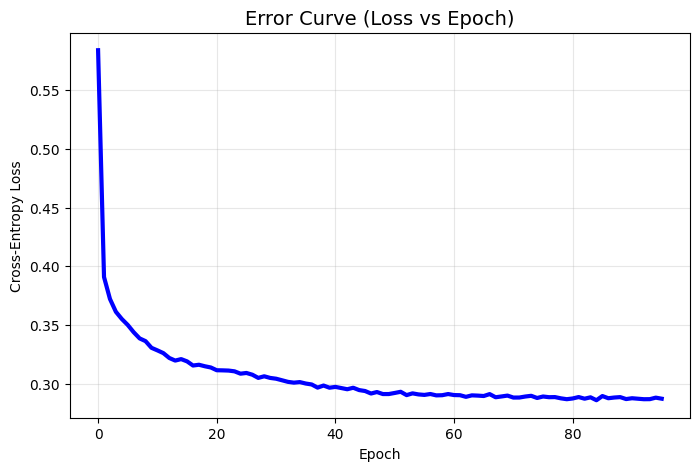

In [104]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(mlp.loss_curve_, 'b-', linewidth=3)
plt.title('Error Curve (Loss vs Epoch)', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.grid(True, alpha=0.3)
plt.show()

In [105]:
print("TRAINING STRATEGY CHOSEN:")
print("→ Mini-batch (batch_size = 64)")
print("→ One weight update after every 64 images")
print("→ Total batches per epoch:", len(X_train)//64)

TRAINING STRATEGY CHOSEN:
→ Mini-batch (batch_size = 64)
→ One weight update after every 64 images
→ Total batches per epoch: 875


In [106]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X_noisy = X_test.copy()
n_noise = int(0.1 * len(X_test))           # 10% of test images
idx_noise = np.random.choice(len(X_test), n_noise, replace=False)

for idx in idx_noise:
    img = X_noisy[idx]                     # 49 features
    n_pixels = np.random.randint(3, 8)     # 3–7 random features
    pixels = np.random.choice(49, n_pixels, replace=False)
    noise_strength = np.random.uniform(0.03, 0.10, n_pixels)
    img[pixels] += noise_strength
    img[pixels] = np.clip(img[pixels], 0, 1)

# Predict
acc_clean = mlp.score(X_test, y_test)
acc_noisy = mlp.score(X_noisy, y_test)

Clean accuracy : 0.9093
Noisy accuracy : 0.9051
Drop           : 0.0042 (0.5%)


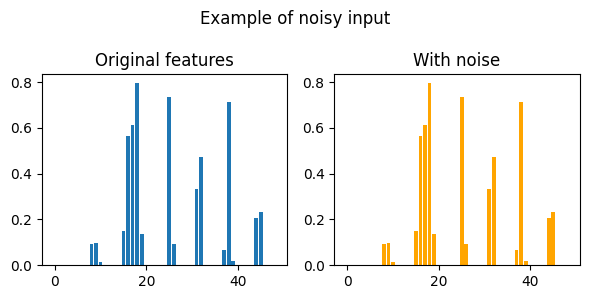

In [107]:
print(f"Clean accuracy : {acc_clean:.4f}")
print(f"Noisy accuracy : {acc_noisy:.4f}")
print(f"Drop           : {acc_clean-acc_noisy:.4f} ({(acc_clean-acc_noisy)/acc_clean:.1%})")

# Show one noisy example
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.bar(range(49), X_test[0])
plt.title('Original features')
plt.subplot(1,2,2)
plt.bar(range(49), X_noisy[0], color='orange')
plt.title('With noise')
plt.suptitle('Example of noisy input')
plt.tight_layout()
plt.show()

In [108]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [109]:
from google.colab import files
uploaded = files.upload()

Fixed Image 0.png:
 - Size: (28, 28) (should be (28, 28))
 - Mode: L (now 'L' for grayscale)
 - Is grayscale: True


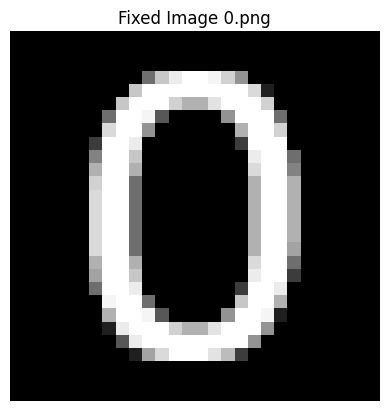

Fixed Image 1.png:
 - Size: (28, 28) (should be (28, 28))
 - Mode: L (now 'L' for grayscale)
 - Is grayscale: True


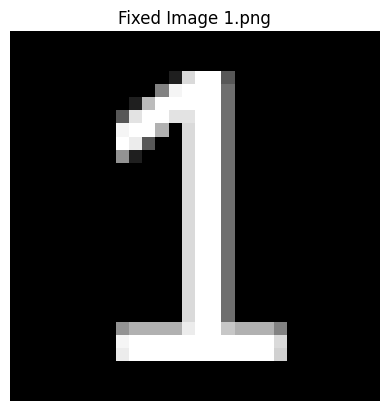

Fixed Image 2.png:
 - Size: (28, 28) (should be (28, 28))
 - Mode: L (now 'L' for grayscale)
 - Is grayscale: True


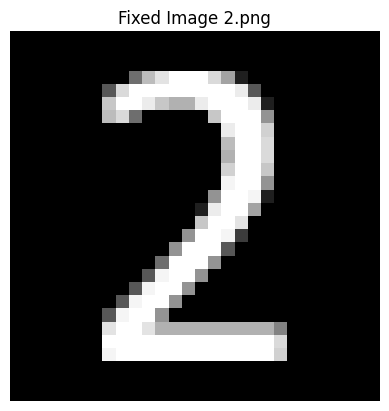

Fixed Image 3.png:
 - Size: (28, 28) (should be (28, 28))
 - Mode: L (now 'L' for grayscale)
 - Is grayscale: True


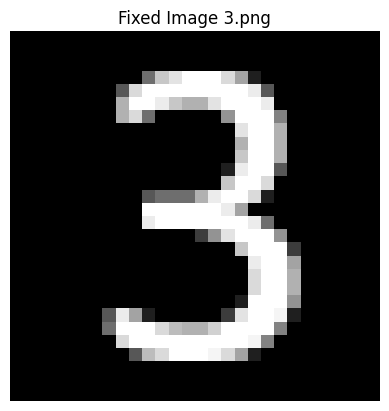

Fixed Image 4.png:
 - Size: (28, 28) (should be (28, 28))
 - Mode: L (now 'L' for grayscale)
 - Is grayscale: True


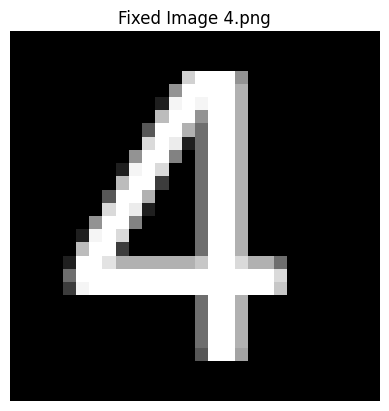

Fixed Image 5.png:
 - Size: (28, 28) (should be (28, 28))
 - Mode: L (now 'L' for grayscale)
 - Is grayscale: True


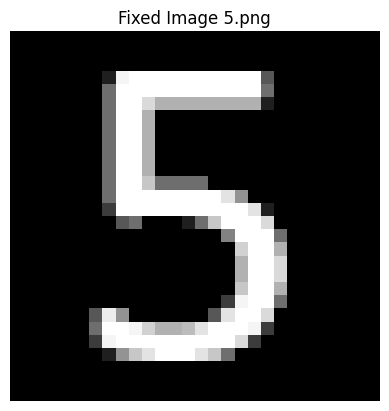

Fixed Image 6.png:
 - Size: (28, 28) (should be (28, 28))
 - Mode: L (now 'L' for grayscale)
 - Is grayscale: True


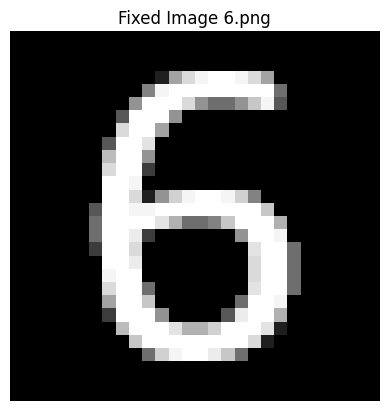

Fixed Image 7.png:
 - Size: (28, 28) (should be (28, 28))
 - Mode: L (now 'L' for grayscale)
 - Is grayscale: True


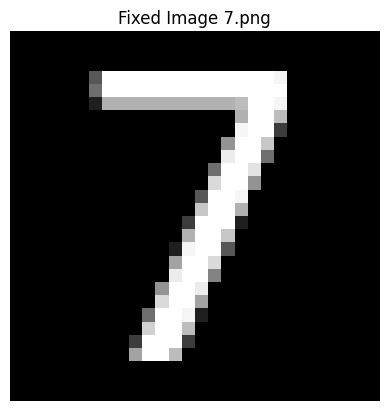

Fixed Image 8.png:
 - Size: (28, 28) (should be (28, 28))
 - Mode: L (now 'L' for grayscale)
 - Is grayscale: True


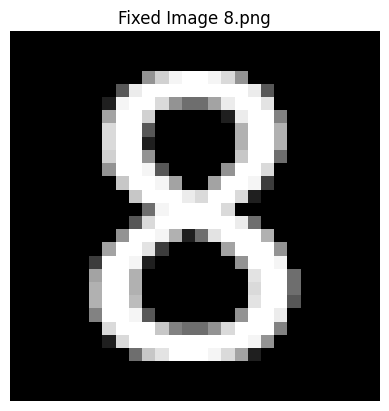

Fixed Image 9.png:
 - Size: (28, 28) (should be (28, 28))
 - Mode: L (now 'L' for grayscale)
 - Is grayscale: True


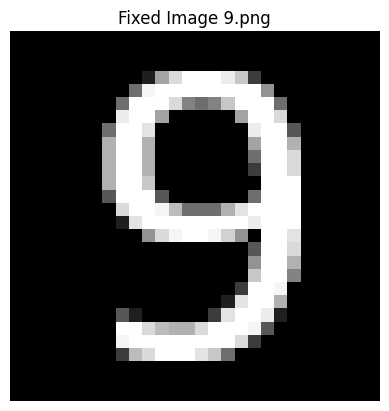

In [134]:
for i in range(10):
    try:
        img = Image.open(f"{i}.png").convert('L')  # Force convert to grayscale 'L'
        img.save(f"{i}_new.png")  # Save fixed grayscale version
        print(f"Fixed Image {i}.png:")
        print(f" - Size: {img.size} (should be (28, 28))")
        print(f" - Mode: {img.mode} (now 'L' for grayscale)")
        print(f" - Is grayscale: {len(img.getbands()) == 1}")

        # Display the fixed image for visual check
        plt.imshow(img, cmap='gray')
        plt.title(f"Fixed Image {i}.png")
        plt.axis('off')
        plt.show()

        # Warning if size is wrong
        if img.size != (28, 28):
            print("WARNING: Resized to 28x28 for MNIST compatibility!")
            img = img.resize((28, 28))
            img.save(f"{i}_fixed_resized.png")  # Save resized version
    except FileNotFoundError:
        print(f"ERROR: {i}.png not found!")

In [140]:
mlp_strong = MLPClassifier(
    hidden_layer_sizes=(128, 64),  # Stronger: 2 layers with more neurons
    activation='relu',
    learning_rate='adaptive',      # Better: auto-adjusts lr
    learning_rate_init=0.01,
    batch_size=128,                # Larger batch for stability
    max_iter=300,                  # More epochs for better training
    random_state=42,
    verbose=True
)

# Train the stronger model
mlp_strong.fit(X_train, y_train)

# Print accuracies
train_acc = mlp_strong.score(X_train, y_train)
test_acc = mlp_strong.score(X_test, y_test)
print(f"\nTrain accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

Iteration 1, loss = 0.34392347
Iteration 2, loss = 0.18569321
Iteration 3, loss = 0.15015314
Iteration 4, loss = 0.13797907
Iteration 5, loss = 0.12308732
Iteration 6, loss = 0.11484515
Iteration 7, loss = 0.10637492
Iteration 8, loss = 0.10294475
Iteration 9, loss = 0.09394696
Iteration 10, loss = 0.09379203
Iteration 11, loss = 0.09123096
Iteration 12, loss = 0.08644157
Iteration 13, loss = 0.08228219
Iteration 14, loss = 0.08368378
Iteration 15, loss = 0.07784433
Iteration 16, loss = 0.07801263
Iteration 17, loss = 0.07569356
Iteration 18, loss = 0.07613153
Iteration 19, loss = 0.07051526
Iteration 20, loss = 0.06626662
Iteration 21, loss = 0.06844079
Iteration 22, loss = 0.06967619
Iteration 23, loss = 0.06581822
Iteration 24, loss = 0.06043054
Iteration 25, loss = 0.06970469
Iteration 26, loss = 0.06151765
Iteration 27, loss = 0.06071711
Iteration 28, loss = 0.06487927
Iteration 29, loss = 0.06095703
Iteration 30, loss = 0.05732068
Iteration 31, loss = 0.05863278
Iteration 32, los

In [138]:
def extract_4x4(img28):
    feats = []
    for i in range(0, 28, 4):
        for j in range(0, 28, 4):
            patch = img28[i:i+4, j:j+4]
            feats.append(patch.mean())
    return np.array(feats)

# Load your digits as 28x28 images and extract features
X_my = []
for i in range(10):
    im = Image.open(f"my{i}.png").convert('L')  # Use your file names
    arr = np.array(im) / 255.0  # 28x28 array
    feats = extract_4x4(arr)  # Now 49 features
    X_my.append(feats)
X_my = np.array(X_my)  # (10, 49)
print(X_my)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.39215686e-03 1.22549020e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.79901961e-02 4.61029412e-01 7.88235294e-01
  5.38970588e-01 0.00000000e+00 4.90196078e-04 1.46568627e-01
  6.22794118e-01 3.06127451e-01 3.04901961e-01 4.77941176e-01
  1.10294118e-02 2.35294118e-02 4.78186275e-01 5.98039216e-02
  2.94117647e-03 8.43137255e-02 3.69362745e-01 1.07843137e-02
  7.59803922e-02 7.99754902e-01 1.83578431e-01 4.38725490e-02
  4.96568627e-01 2.39950980e-01 0.00000000e+00 4.90196078e-03
  3.34313725e-01 6.62254902e-01 7.38480392e-01 3.82843137e-01
  3.18627451e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  3.67647059e-03 8.33333333e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.23529412e-02
  1.44607843e-02 0.00000000e+00 4.90196078e-04 0.00000000e+00
  0.00000000e+00 0.00000000e+00 4.35294118e-01 2.14705882e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000


Fixed Predictions:
Digit 0 -> Predicted: 0 [CORRECT] Confidence: 99.6%
Digit 1 -> Predicted: 1 [CORRECT] Confidence: 99.5%
Digit 2 -> Predicted: 1 [WRONG] Confidence: 53.1%
Digit 3 -> Predicted: 3 [CORRECT] Confidence: 96.3%
Digit 4 -> Predicted: 4 [CORRECT] Confidence: 99.2%
Digit 5 -> Predicted: 5 [CORRECT] Confidence: 87.9%
Digit 6 -> Predicted: 1 [WRONG] Confidence: 71.8%
Digit 7 -> Predicted: 7 [CORRECT] Confidence: 77.1%
Digit 8 -> Predicted: 8 [CORRECT] Confidence: 99.4%
Digit 9 -> Predicted: 9 [CORRECT] Confidence: 98.9%


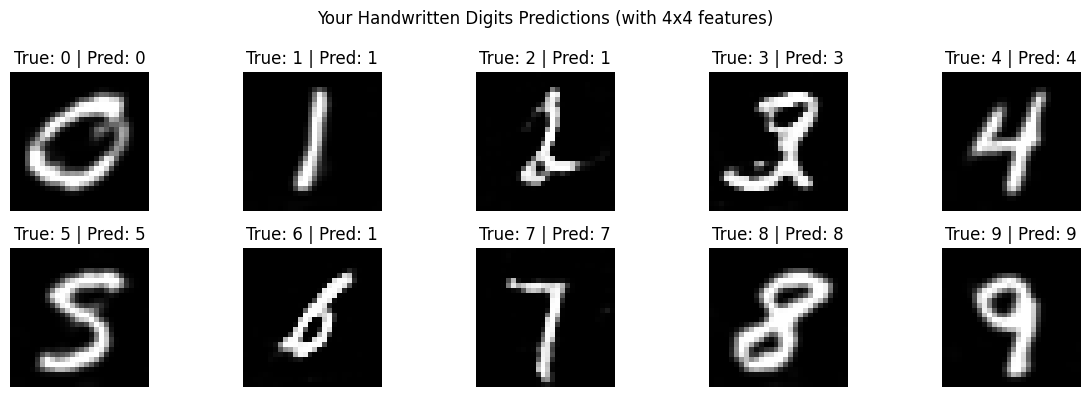

In [139]:
preds = mlp.predict(X_my)
conf = mlp.predict_proba(X_my).max(axis=1)

# Print results
print("\nFixed Predictions:")
for i in range(10):
    status = "CORRECT" if preds[i] == i else "WRONG"
    print(f"Digit {i} -> Predicted: {preds[i]} [{status}] Confidence: {conf[i]:.1%}")

# Plot with predictions
plt.figure(figsize=(12, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    img = Image.open(f"my{i}.png").convert('L')
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {i} | Pred: {preds[i]}")
    plt.axis('off')
plt.suptitle("Your Handwritten Digits Predictions (with 4x4 features)")
plt.tight_layout()
plt.show()